# Probability densities and Bayes rule

* Emmanuel Cosme, 2017
* update 5 January 2018 and 9 December 2020

This notebook illustrates graphically what are a density probability, conditional and marginal densities, and Bayes rule.

1. Define a prior density. Plot it along with conditional and marginal densities.
2. Define a likekihood function based on the result of a measurement process. Plot.
3. Apply Bayes rule. Plot posterior density along with conditional and marginal densities.

Capital letters ($X$, $Y$, $Z$) indicate random variables. Small letters without exponent ($x$, $y$, $z$) indicate function arguments. Small letters with exponents ($z^o$) are real numbers. 

## Import modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
%matplotlib inline

## 1. Prior density

This defines the prior density used later to apply Bayes rule. Here we are considering a random vector with 2 components $X$ and $Y$. The density is called $p_{X,Y}$. It is defined below as the sum of 2 Gaussian "bells" (see plot below).

In [43]:
x=np.arange(0,10,0.01)
y=np.arange(0,10,0.01)

def density(x,y):
    a = 0.6*(x-4)**2 + 0.4*(y-4)**2
    b = 0.5*(x-7)**2 + 0.5*(y-7)**2
    c = np.exp(-a)+0.5*np.exp(-b)
    c /= np.max(c)
    return c

xm, ym = np.meshgrid(x,y)
pm = density(xm,ym)

### Marginal and conditional densities...

...of the previously defined 2D density. This is to illustrate what $p_X$ and $p_Y$ look like. The calculation follows the marginalization rule from $p_{X,Y}$ defined above:
$$ p_X(x) = \int p_{X,Y}(x,y) dy $$

Note that meshgrid switches x and y for the plots...

In [3]:
# Marginal densities p(x) and p(y)
px = np.sum(pm,axis=0)
py = np.sum(pm,axis=1)

# Conditional density p_{X|y=3.5}(x)
n1 = 3.5
wy1 = np.argwhere(y==n1).squeeze()
px_y1 = pm[wy1,:]      # conditional density. Note that meshgrid switches x and y...

# Normalize for a fancy plot
px/=np.max(px)
py/=np.max(py)

# Useful axes for plots
y10 = np.ones_like(x)*10   # used later to plot px as a line on the y=10 plane
x0 = np.ones_like(y)*0     # used later to plot py on the x=0 plane
y1 = np.ones_like(x)*n1

### Plot

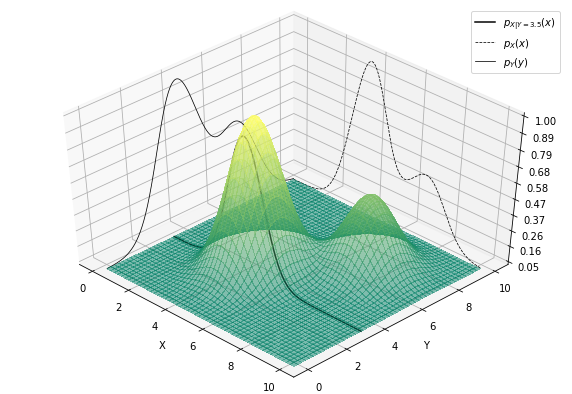

In [53]:
# Start figure
fig = plt.figure(figsize=(10,7))
ax = fig.gca(projection='3d')

ax.plot(x, y1, px_y1, label='$p_{X|Y=3.5}(x)$',color='black')
ax.plot(x, y10, px, label='$p_X(x)$',color='black',linestyle='dashed',linewidth=0.75)
ax.plot(x0, y, py, label='$p_Y(y)$',color='black',linestyle='solid',linewidth=0.75)

# Plot the surface.
surf = ax.plot_surface(xm, ym, pm, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)
#coolwarm
# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -45, elev = 45)

# Add a color bar which maps values to colors.
#fig.colorbar(surf, shrink=0.5, aspect=5)

ax.legend()

#plt.savefig('initial_pdf.png')
plt.show()

## 2. Likelihood function

We assume that an imperfect device collects a measurement $Z$ of the quantity $Y+0.4\sqrt{X}$, prone to some error $\Theta$:
$$ Z = Y + 0.4 \sqrt{X} + \Theta$$
and we know that $\Theta$ (a random number, of course) follows the probability law:
$$ p_{\Theta}(\theta) = \alpha~e^{-3|\theta|} $$
with $\alpha$ a normalization factor. So, the observation probability density writes:
    $$ p_{Z|X=x,Y=y}(z) = \alpha~e^{-3|z - y - 0.4\sqrt{x}|} $$

(Note that an exponential law of this type is not very common to describe uncertainties, which are more often Gaussian. But I chose an exponential to distinguish from the prior).

In the cell below:

1. a first function "pxyz" takes 3 arguments $x$ ,$y$, $z$ and returns $\alpha~e^{-3|z - y - \sqrt{x}|}$;
2. a second function "make_pobs" creates the observation pdf, function of $z$ only;
3. a third function "make_likelihood" creates the likelihood function with arguments $x$ and $y$ only.

In [15]:
def pxyz(x,y,z):
    a = z - y - 0.4 * np.sqrt(x)
    a = np.exp(-3*abs(a))
    a /= np.max(a)
    return a

def make_pobs(x,y):
    def pobs(z):
        a = pxyz(x,y,z)
        a /= np.max(a)
        return a
    return pobs

def make_likelihood(z):
    def likelihood(x,y):
        a = pxyz(x,y,z)
        a /= np.max(a)
        return a
    return likelihood

Here, we create and plot the observation pdf when $x=3$ and $y=2$. The value of $y-0.4\sqrt{x}$ is printed, too. We see that the curve covers a region close to this value, given the exponential uncertainty.

('y + 0.4 sqrt(x) = ', 2.6928203230275507)


Text(0.5, 1.0, 'Observation pdf')

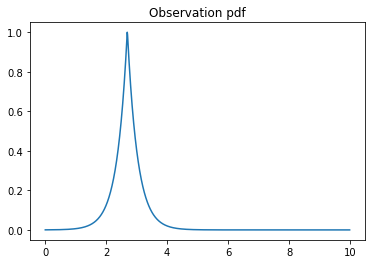

In [28]:
print(('y + 0.4 sqrt(x) = ', 2+0.4*np.sqrt(3)))
pobs32 = make_pobs(3,2)
z = np.arange(0,10,0.01)
plt.plot(z, pobs32(z))
plt.title('Observation pdf')

Now, we assume that the measurement is performed, and the output is $z^o=6$. Below, we create the likelihood function and plot it.

In [24]:
likelihood = make_likelihood(6)
lm = likelihood(xm,ym)

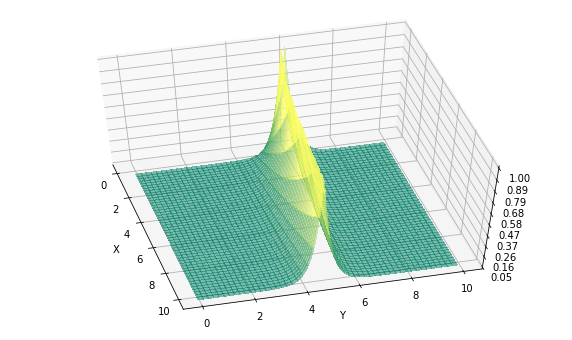

In [52]:
# Start figure
fig = plt.figure(figsize=(10,6))
ax = fig.gca(projection='3d')

# Plot the surface.
surf = ax.plot_surface(xm, ym, lm, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -15, elev = 55)

#plt.savefig('likelihood.png')
plt.show()

## 3. Bayes rule

Bayes rule consists in the product of the prior density and the likelihood defined above, to provide the posterior density. Below, the marginal posterior densities of $x$ and $y$ are also computed. The posterior density is
$$ p_{X,Y|Z=z^o}(x,y)$$


In [30]:
pa=pm*lm
pa /= np.max(pa)

pax = np.sum(pa,axis=0)
pax /= np.max(pax)
pay = np.sum(pa,axis=1)
pay /= np.max(pay)

### Plot

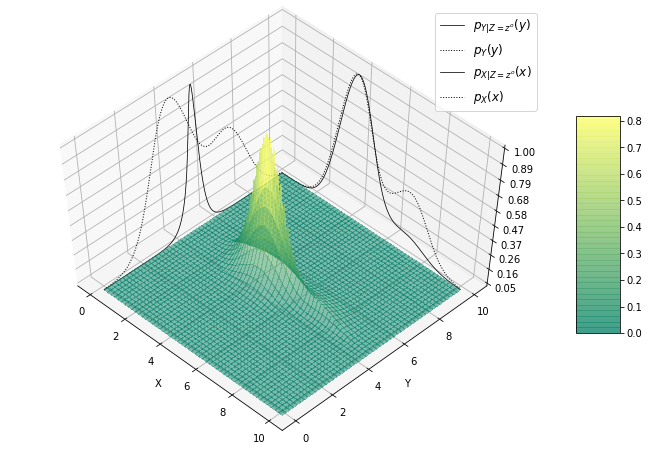

In [50]:
# Start figure
fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')

ax.plot(y, pay, zdir='x', label='$p_{Y|Z=z^o}(y)$',color='black',linestyle='solid',linewidth=0.75)
ax.plot(y, py, zdir='x', label='$p_{Y}(y)$',color='black',linestyle='dotted',linewidth=1)
ax.plot(x, y10, pax, label='$p_{X|Z=z^o}(x)$',color='black',linestyle='solid',linewidth=0.75)
ax.plot(x, y10, px, label='$p_X(x)$',color='black',linestyle='dotted',linewidth=1)

# Plot the surface.
surf = ax.plot_surface(xm, ym, pa, cmap=cm.summer, alpha=0.5,
                       linewidth=0, antialiased=False)

# Set axis labels
ax.set_xlabel('X')
ax.set_ylabel('Y')

# Customize the z axis.
ax.set_zlim(0.05, 1.0)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Set viewing angle and elevation
ax.view_init(azim = -45, elev = 55)

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.legend(prop={'size': 12})

#plt.savefig('posterior_pdf_1.png')
plt.show()